# DSCI 100 Group 37: Final Project

## Description and usage of the game data:

In this project, we will be working with local game data from UBC (University of British Columbia), called PLAIcraft, ran by a group of people in the department of Computer Science. This project aims to conver analysis and modelling of the data, visualizing it graphically to predict any correlations between any variables used. The data consists of two files: Project_Planning_Players.csv and Sessions.  This project will only require the Players data.  

## Predicting Experience Level Using Age and Hours Played

### Introduction



The player dataset includes unique data for each individual player. There are 196 observations, which indicate the number of players in the dataset and 7 variables. 

|Variable|Type|Description|
|--------|----|-----------|
|experience|Character|Experience level of a player|
|subscribe|Character|If the player is subscribed to the news letter|
|hashedEmail|Character|Player's unique hashed email|
|played_hours|double|Number of hours played|
|name|Character|Name of player|
|gender|Character|Gender of player|
|Age|Double|Age of player|

## Loading the data into Jupiter

Below only the Project_Planning_Players.csv will be loaded in, as it is the only file that we need to complete the project

In [1]:
library(tidyverse)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
player_url<- "https://raw.githubusercontent.com/tiannawong/dsci100-individual-project-/refs/heads/main/players.csv"

player_data <- read_csv(player_url)
head(player_data)
tail(player_data)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Amateur,TRUE,644fe4200c19a73768b3fa598afcbd0948f7557925b7f17166285da23af31cc6,0.0,Rhys,Male,20
Amateur,TRUE,b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,0.0,Bailey,Female,17
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


The head and the tail is shown above for *Project_Planning_Players.csv*

## Wrangling

Below, we want to choose all the columns we need, as we are trying to predict which experience level plays the most for certain age and playing time.  We will make it simplified by selecting only Experience, played_hours, and Age.

In [8]:
select_player_data <- player_data |>
    select(experience, Age, played_hours)
head(select_player_data)
tail(select_player_data)

experience,Age,played_hours
<chr>,<dbl>,<dbl>
Pro,9,30.3
Veteran,17,3.8
Veteran,17,0.0
Amateur,21,0.7
Regular,21,0.1
Amateur,17,0.0


experience,Age,played_hours
<chr>,<dbl>,<dbl>
Amateur,20,0.0
Amateur,17,0.0
Veteran,22,0.3
Amateur,17,0.0
Amateur,17,2.3
Pro,NA,0.2


## Methods and Results

In this project, we want to use k-nn classification to predict a new user's experience level.  Before we model and train the data, we want to perform simple visualizations to get a better understanding of what we are working with.  Below will be graphs that visualize different aspects of the data.

Warning message in geom_histogram(stat = "count"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


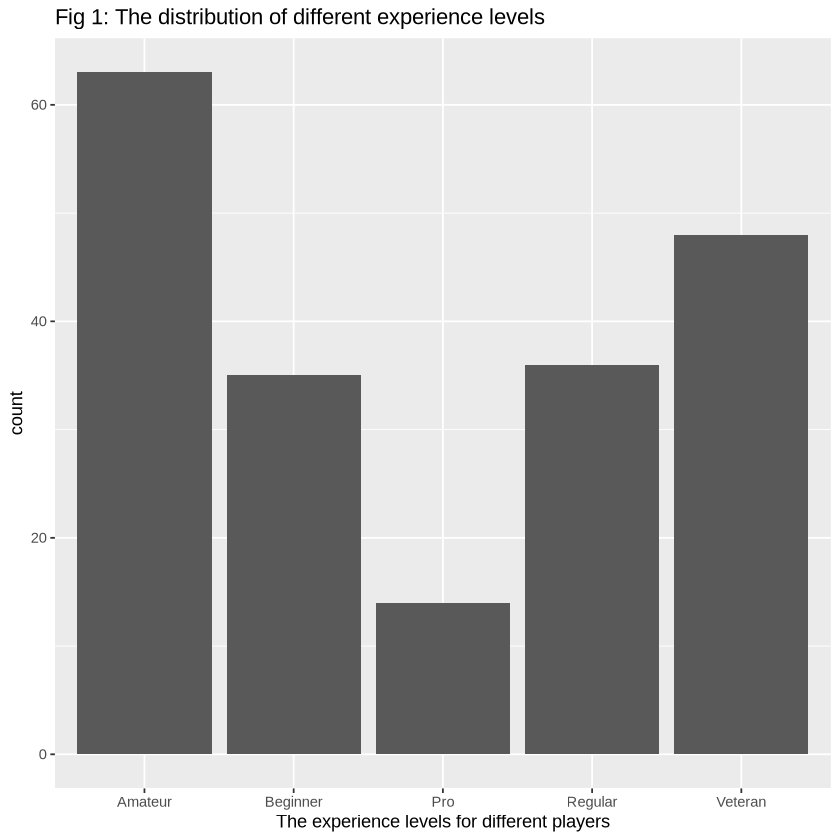

In [28]:
select_player_data_hist <- select_player_data |>
    ggplot(aes(x = experience)) +
    geom_histogram(stat = "count") +
    labs(x = "The experience levels for different players", color = "Experience level", title = "Fig 1: The distribution of different experience levels")
select_player_data_hist

Warning message:
“Removed 16 rows containing missing values or values outside the scale range
(`geom_point()`).”


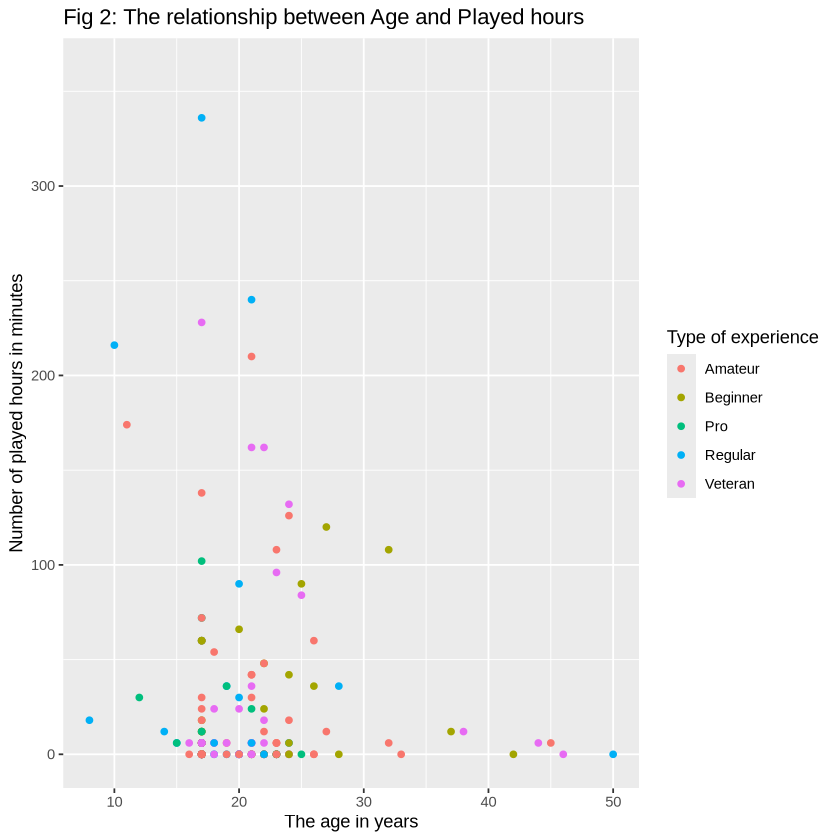

In [38]:
select_player_data_plot <- select_player_data |>
    mutate(played_mins = (played_hours * 60)) |>
    ggplot(aes(x = Age, y = played_mins)) +
    ylim(0, 360) +
    geom_point(aes(color = experience)) +
    labs(x = "The age in years", y = "Number of played hours in minutes", color = "Type of experience", title = "Fig 2: The relationship between Age and Played hours")
select_player_data_plot